In [1]:
# Step 1: Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist

In [2]:
#Steo 2: Load Dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
#Step 3: Preprocess the Dataset
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(f"Training data shape: {x_train.shape}, Test data shape: {x_test.shape}")

Training data shape: (60000, 784), Test data shape: (10000, 784)


In [4]:
#Step 4: Build Autoencoder Model
encoding_dim = 32  # Size of encoded representation (compressed feature size)

# Input placeholder
input_img = Input(shape=(784,))

# Encoder network
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder network
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model (for extracting compressed features)
encoder = Model(input_img, encoded)

In [5]:
#Step 5: Compile the Model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
#Step 6: Train the Autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.2441 - val_loss: 0.1686
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1503 - val_loss: 0.1362
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1318 - val_loss: 0.1249
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1213 - val_loss: 0.1163
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1154 - val_loss: 0.1122
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1118 - val_loss: 0.1086
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1083 - val_loss: 0.1062
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1053 - val_loss: 0.1029
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1034 - val_loss: 0.1013
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1018 - val_loss: 0.0998

In [8]:
#Step 7: Evaluate the Model
loss = autoencoder.evaluate(x_test, x_test, verbose=0)
print(f"\nTest Reconstruction Loss: {loss:.4f}")



Test Reconstruction Loss: 0.0912


In [9]:
#Step 8: Predict (Reconstruct Images)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 0s 1ms/step


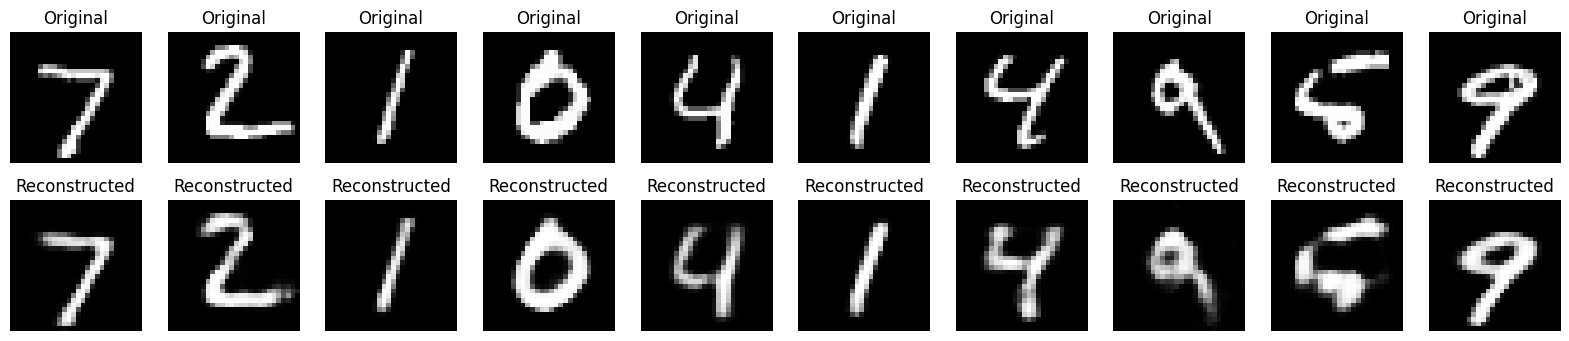

In [10]:
#Step 9: Visualize the Results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()